# Read in data

In [9]:
def load_cc_Farpoint(step):
    cc = h5_read_dict(f'/home/isultan/data/Farpoint/CoreCatalog/{step}.corepropertiesextend.hdf5')
    centrals_mask = cc['central'] == 1
    idx_m21_cc = many_to_one(cc['tree_node_index'][~centrals_mask], cc['tree_node_index'][centrals_mask], verbose=True, assert_x0_unique=True, assert_x1_in_x0=False)
    for hk, k in CC_HOST_VARS[:1]:
        cc[hk] = np.zeros_like(cc[k])
        cc[hk][~centrals_mask] = cc[k][centrals_mask][idx_m21_cc]
        cc[hk][centrals_mask] = cc[k][centrals_mask]
    return cc, centrals_mask

In [10]:
# Farpoint read-in
%time cc_FP0, centrals_mask_FP0 = load_cc_Farpoint(499)
%time cc_FP1, centrals_mask_FP1 = load_cc_Farpoint(247)

Assert 1: Elements of x0arr are unique.
CPU times: user 2min 29s, sys: 7min 4s, total: 9min 34s
Wall time: 11min 54s
Assert 1: Elements of x0arr are unique.
CPU times: user 2min 10s, sys: 4min 58s, total: 7min 9s
Wall time: 9min 21s


# Create host bins

In [11]:
m_bin_all0 = []
for lM, Nhalosb in zip([12.0, 12.5, 13.0, 13.5, 14.0, 14.5], [10**4,10**4,10**4,10**4,10**4,10**3]):
    m_bin_all0.append(hostbins(cc_FP0, centrals_mask_FP0, 10**lM, 10**(lM+0.5), verbose=True, Nhalos=Nhalosb, minHalosFlag=True))

Total host halos within mass threshold 2514408
Number of host halos in bin 1.0043e+04
Host halo mass bin size: 2.7789885e+09
Number of infall halos: 403127
Hosts with no infall halos: 0 (0.0%)

Total host halos within mass threshold 886146
Number of host halos in bin 1.0001e+04
Host halo mass bin size: 2.5242894e+10
Number of infall halos: 1269321
Hosts with no infall halos: 1 (0.009999000099991662%)

Total host halos within mass threshold 298669
Number of host halos in bin 1.e+04
Host halo mass bin size: 2.3399288e+11
Number of infall halos: 4163492
Hosts with no infall halos: 0 (0.0%)

Total host halos within mass threshold 89670
Number of host halos in bin 1.e+04
Host halo mass bin size: 2.4548947e+12
Number of infall halos: 13916904
Hosts with no infall halos: 0 (0.0%)

Total host halos within mass threshold 21446
Number of host halos in bin 1.e+04
Host halo mass bin size: 3.9112766e+13
Number of infall halos: 49988167
Hosts with no infall halos: 0 (0.0%)

Total host halos within m

In [36]:
m_bin_all1 = []
for lM, Nhalosb in zip([12.0, 12.5, 13.0, 13.5, 14.0, 14.5], [10**0,10**5,3*10**5,7*10**5,5*10**5,3*10**4]):
    m_bin_all1.append(hostbins(cc_FP1, centrals_mask_FP1, 10**lM, 10**(lM+0.5), verbose=True, Nhalos=Nhalosb, minHalosFlag=True))

Total host halos within mass threshold 13726281
Number of host halos in bin 5.83e+02
Host halo mass bin size: 0.e+00
Number of infall halos: 5259
Hosts with no infall halos: 338 (57.97598627787307%)

Total host halos within mass threshold 11308957
Number of host halos in bin 1.00142e+05
Host halo mass bin size: 2.8994437e+10
Number of infall halos: 986008
Hosts with no infall halos: 63257 (63.167302430548624%)

Total host halos within mass threshold 8086253
Number of host halos in bin 3.00033e+05
Host halo mass bin size: 3.5492725e+11
Number of infall halos: 3107632
Hosts with no infall halos: 188643 (62.874083850776415%)

Total host halos within mass threshold 4046775
Number of host halos in bin 7.00049e+05
Host halo mass bin size: 4.73962e+12
Number of infall halos: 7281548
Hosts with no infall halos: 430355 (61.47498246551313%)

Total host halos within mass threshold 977363
Number of host halos in bin 5.00268e+05
Host halo mass bin size: 3.7818705e+13
Number of infall halos: 5321846

In [39]:
print('z=0')
for bin_mask, Mavg, Nhalos in m_bin_all0:
    print( 'logMavg', round(np.log10(Mavg), 1) )
    print('Mmin(1e12)', round(cc_FP0['M'][bin_mask].min()/1.e12, 3))
    print('Mmax(1e12)', round(cc_FP0['M'][bin_mask].max()/1.e12, 3))
    print('Nhalos', Nhalos)
    print()

print('z=1')
for bin_mask, Mavg, Nhalos in m_bin_all1:
    print( 'logMavg', round(np.log10(Mavg), 1) )
    print('Mmin(1e12)', round(cc_FP1['M'][bin_mask].min()/1.e12, 3))
    print('Mmax(1e12)', round(cc_FP1['M'][bin_mask].max()/1.e12, 3))
    print('Nhalos', Nhalos)
    print()

z=0
logMavg 12.0
Mmin(1e12) 1.0
Mmax(1e12) 1.003
Nhalos 10043

logMavg 12.5
Mmin(1e12) 3.162
Mmax(1e12) 3.188
Nhalos 10001

logMavg 13.0
Mmin(1e12) 10.0
Mmax(1e12) 10.234
Nhalos 10000

logMavg 13.5
Mmin(1e12) 31.623
Mmax(1e12) 34.078
Nhalos 10000

logMavg 14.1
Mmin(1e12) 100.003
Mmax(1e12) 139.115
Nhalos 10000

logMavg 14.5
Mmin(1e12) 316.239
Mmax(1e12) 374.719
Nhalos 1000

z=1
logMavg 12.0
Mmin(1e12) 1.0
Mmax(1e12) 1.0
Nhalos 137

logMavg 12.5
Mmin(1e12) 3.162
Mmax(1e12) 3.191
Nhalos 8677

logMavg 13.0
Mmin(1e12) 10.0
Mmax(1e12) 10.355
Nhalos 8770

logMavg 13.5
Mmin(1e12) 31.625
Mmax(1e12) 36.364
Nhalos 6369

logMavg 14.1
Mmin(1e12) 100.06
Mmax(1e12) 137.879
Nhalos 1395

logMavg 14.5
Mmin(1e12) 316.478
Mmax(1e12) 389.439
Nhalos 30



# Core mass function fitting

In [22]:
from scipy.optimize import curve_fit

In [23]:
OBJECTMASSCUT['FP'] = SIMPARAMS['FP']['PARTICLEMASS']*100

In [24]:
r_eq6 = (-4,-0.5)

FP nH cores 10001
12.501728 [0.04920474] [0.00082211]
FP nH cores 10000
13.005058 [0.0545959] [0.00129005]
FP nH cores 10000
13.516086 [0.06467881] [0.00233066]
FP nH cores 10000
14.068939 [0.06049543] [0.00093634]
FP nH cores 1000
14.53609 [0.05860676] [0.00043442]
FP nH cores 8677
12.501973 [0.09646401] [0.00274891]
FP nH cores 8770
13.007456 [0.10870917] [0.00371541]
FP nH cores 6369
13.529399 [0.13407844] [0.00625822]
FP nH cores 1395
14.061092 [0.13592802] [0.00324329]
FP nH cores 30
14.541581 [0.058] [inf]
FP nH cores 10001
FP nH cores 10000
FP nH cores 10000
FP nH cores 10000
FP nH cores 1000
FP nH cores 8677
FP nH cores 8770
FP nH cores 6369
FP nH cores 1395
FP nH cores 30


Text(0, 0.5, 'ratio')

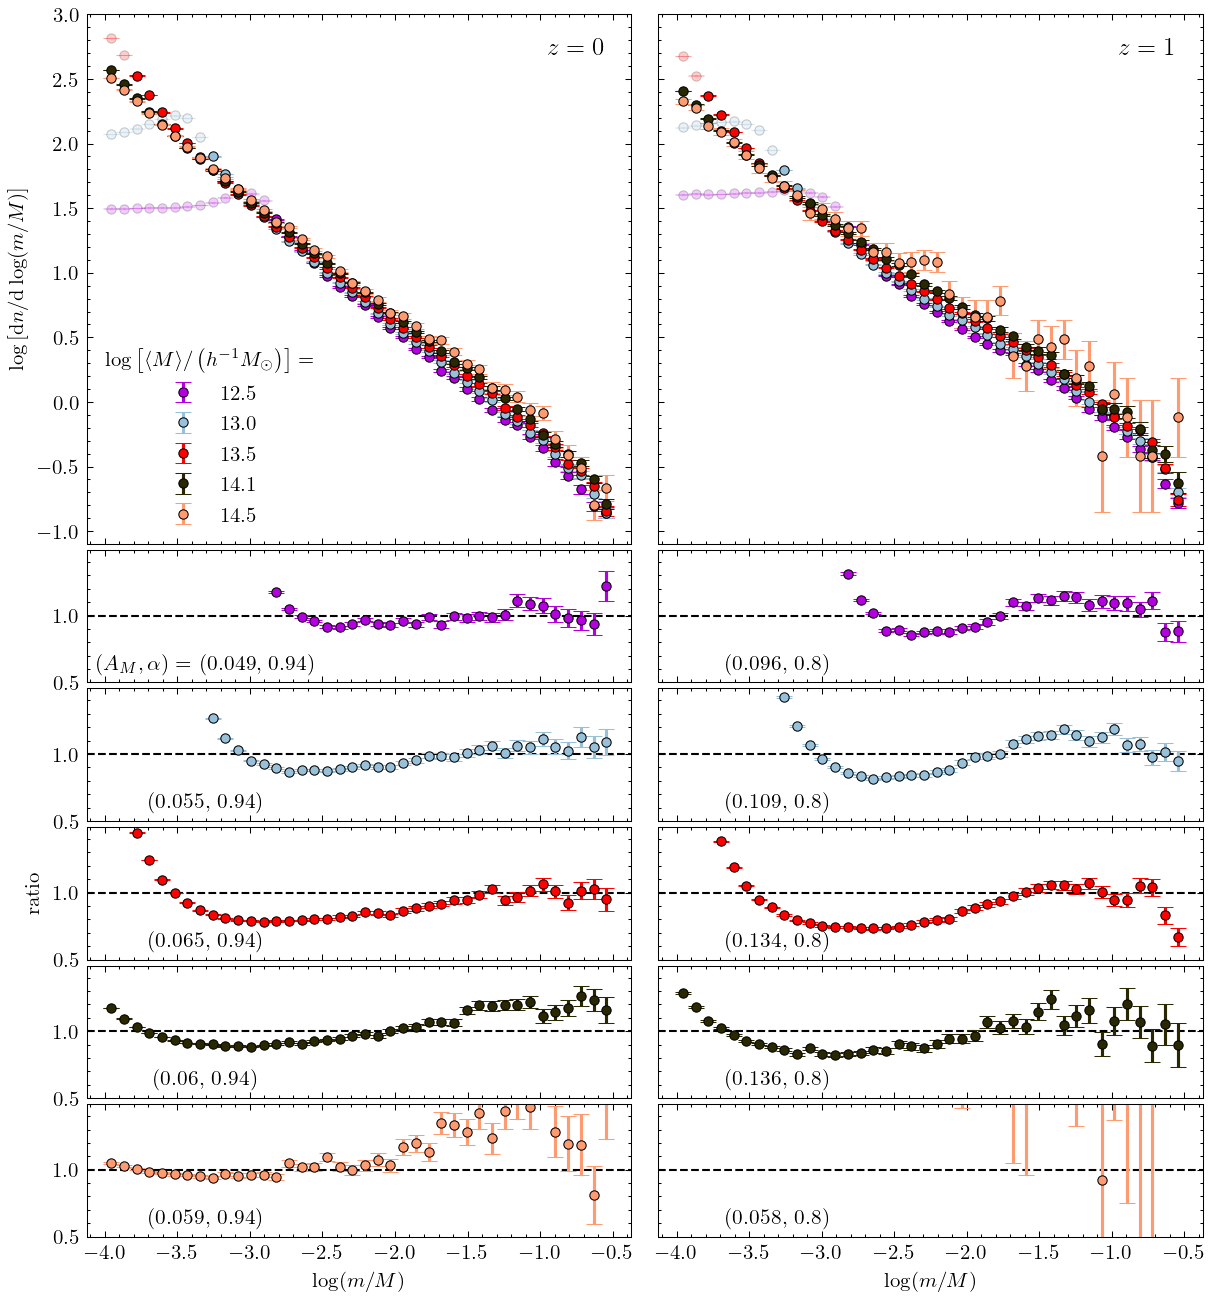

In [38]:
# FINAL VERSION (10/5/20)
# beta=50, omega = 4. and a=1
# Remove 12 bin
# Paper 2 Eq 6 fitting for AM with alpha FIXED for each z
# Host bins seperate fits
# fitting sigma

r = r_eq6
bins = 40
fig, axtup = plt.subplots(6, 2, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'width_ratios': [1, 1], 'hspace':.03, 'height_ratios': [4,1,1,1,1,1]}, figsize=[4.8*2,4.8*9/4])
popt_z = {0:[], 1:[]}

for z, m_bin_all, cc, centrals_mask, ax, axrtup, mass_fitting_fn in zip( (0,1), (m_bin_all0,m_bin_all1), (cc_FP0,cc_FP1), (centrals_mask_FP0,centrals_mask_FP1), axtup[0], (axtup[1:,0], axtup[1:,1]), (mass_fitting_fn_eq6_z0, mass_fitting_fn_eq6_z1) ):
    for (bin_mask, Mavg, Nhalos), c, axr in zip(m_bin_all[1:], COLOR_SCHEME[1:], axrtup):
        x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1=None, M2=None, label='FP', bins=bins, r=r, bin_mask=bin_mask, nH_cores=Nhalos)
        xmask = x > np.log10(OBJECTMASSCUT['FP']/Mavg)
        errorbar(ax, x[xmask], y[xmask], yerr=yerr_log[xmask], label=str(round(np.log10(Mavg), 1)), c=c, alpha=1.0)
        errorbar(ax, x[~xmask], y[~xmask], yerr=yerr_log[~xmask], c=c, alpha=0.2)
        
        popt, pcov = curve_fit(mass_fitting_fn, x[xmask], 10**(y[xmask]), sigma=yerr[xmask], p0=(0.058))
        print(np.log10(Mavg), popt, np.sqrt(np.diag(pcov)))
        popt_z[z].append(popt)
        ##ax.plot(np.linspace(*r, 100), np.log10(mass_fitting_fn(np.linspace(*r, 100), *popt)), '-', color=c, lw=1)
#     ax.set_xlim(-3,-0.4)
#     ax.set_ylim(-1,2)

### ratio plot ###
for z, m_bin_all, cc, centrals_mask, ax, axrtup, mass_fitting_fn in zip( (0,1), (m_bin_all0,m_bin_all1), (cc_FP0,cc_FP1), (centrals_mask_FP0,centrals_mask_FP1), axtup[0], (axtup[1:,0], axtup[1:,1]), (mass_fitting_fn_eq6_z0, mass_fitting_fn_eq6_z1) ):
    for (bin_mask, Mavg, Nhalos), c, axr, popt in zip(m_bin_all[1:], COLOR_SCHEME[1:], axrtup, popt_z[z]):
        x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1=None, M2=None, label='FP', bins=bins, r=r, bin_mask=bin_mask, nH_cores=Nhalos)
        xmask = x > np.log10(OBJECTMASSCUT['FP']/Mavg)
        errorbar(axr, x[xmask], 10**(y[xmask])/mass_fitting_fn(x[xmask], *popt), yerr=yerr[xmask]/mass_fitting_fn(x[xmask], *popt), c=c)
        axr.set_ylim(0.5, 1.49)
        axr.axhline(1, c='k',ls='--', lw='1', zorder=-2)
        axr.set_title((r'$(A_M, \alpha)=$ 'if axr==axtup[1,0] else '')+f'({round(popt[0],3)}, {ALPHA_Z[z]})', x=0.22, y=0, fontsize=10.2)

axtup[0,0].legend(title=r'$\log \left[ \langle M \rangle / \left(h^{{-1}}M_\odot \right) \right]=$', loc=3)
axtup[0,0].set_title('$z=0$', y=0.9, x=0.9)
axtup[0,1].set_title('$z=1$', y=0.9, x=0.9)
axtup[5,0].set_xlabel(r'$\log(m/M)$')
axtup[5,1].set_xlabel(r'$\log(m/M)$')
axtup[0,0].set_ylabel(r'$\log \left[ \mathrm{d}n/\mathrm{d} \log(m/M) \right]$')
axtup[3,0].set_ylabel('ratio')

# axtup[0,0].set_ylim(-4.2,2.2)

FP nH cores 10001
12.501728 [0.04920474] [0.00082211]
FP nH cores 10000
13.005058 [0.0545959] [0.00129005]
FP nH cores 10000
13.516086 [0.06467881] [0.00233066]
FP nH cores 10000
14.068939 [0.06049543] [0.00093634]
FP nH cores 1000
14.53609 [0.05860676] [0.00043442]
FP nH cores 860
12.500195 [0.09661376] [0.00279459]
FP nH cores 295
13.000261 [0.10923405] [0.00350494]
FP nH cores 99
13.500487 [0.058] [inf]
FP nH cores 32
14.001403 [0.058] [inf]
FP nH cores 2
14.501001 [0.058] [inf]
FP nH cores 10001
FP nH cores 10000
FP nH cores 10000
FP nH cores 10000
FP nH cores 1000
FP nH cores 860
FP nH cores 295
FP nH cores 99
FP nH cores 32
FP nH cores 2


Text(0, 0.5, 'ratio')

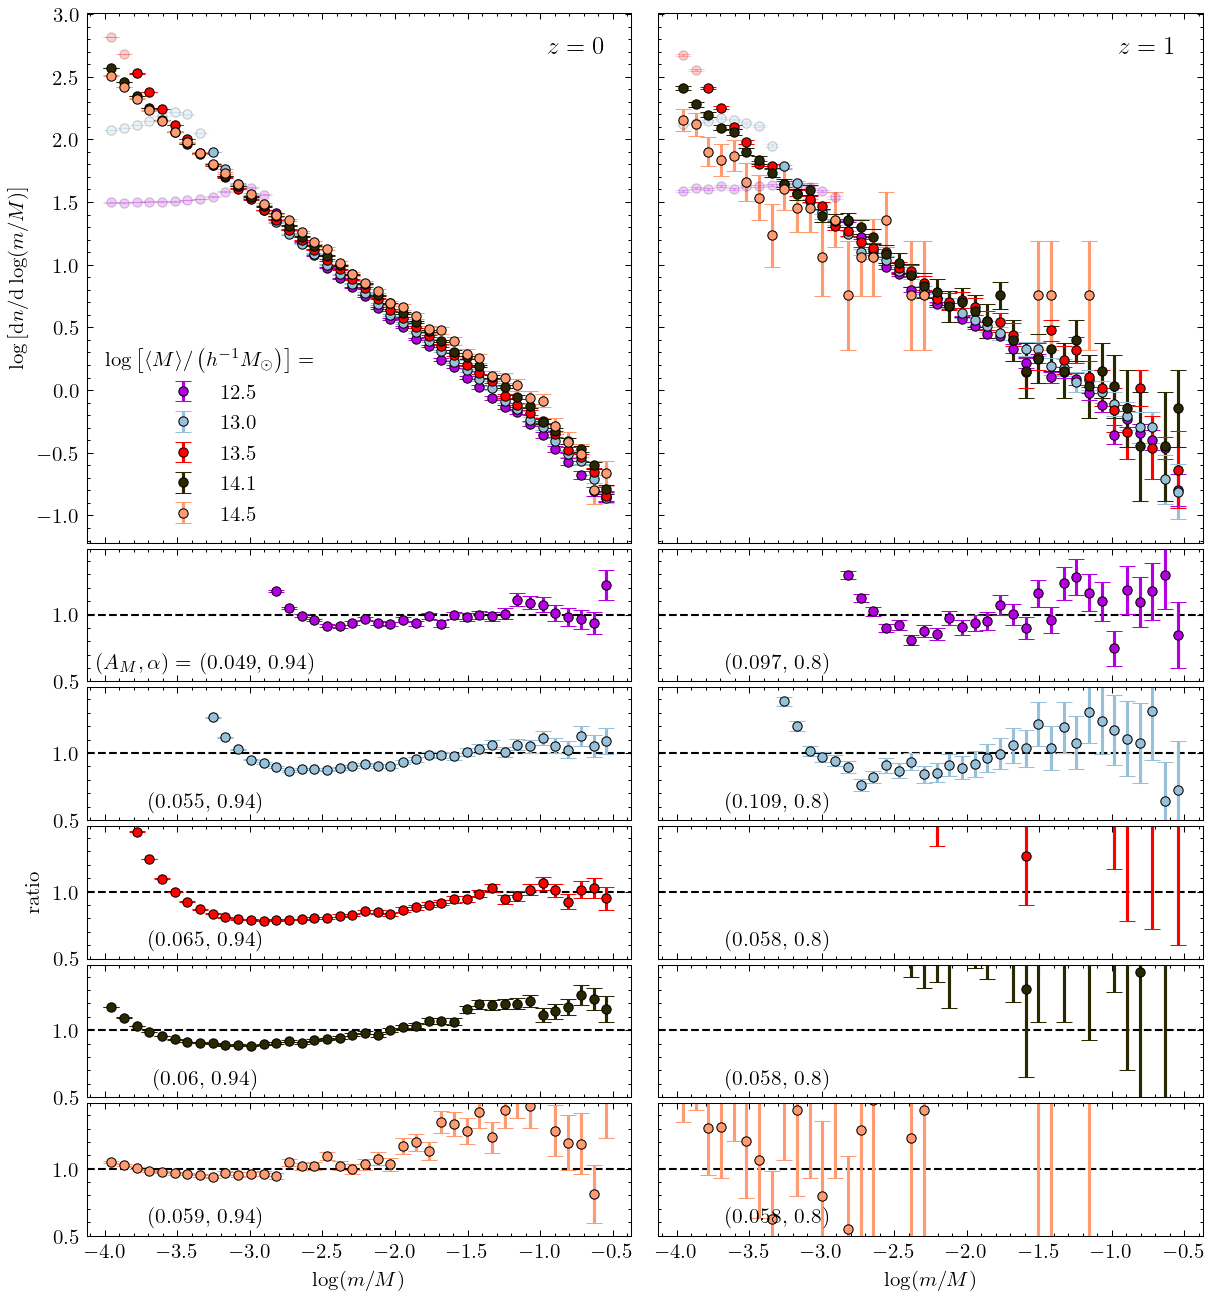

In [27]:
# FINAL VERSION (10/5/20)
# beta=50, omega = 4. and a=1
# Remove 12 bin
# Paper 2 Eq 6 fitting for AM with alpha FIXED for each z
# Host bins seperate fits
# fitting sigma

r = r_eq6
bins = 40
fig, axtup = plt.subplots(6, 2, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'width_ratios': [1, 1], 'hspace':.03, 'height_ratios': [4,1,1,1,1,1]}, figsize=[4.8*2,4.8*9/4])
popt_z = {0:[], 1:[]}

for z, m_bin_all, cc, centrals_mask, ax, axrtup, mass_fitting_fn in zip( (0,1), (m_bin_all0,m_bin_all1), (cc_FP0,cc_FP1), (centrals_mask_FP0,centrals_mask_FP1), axtup[0], (axtup[1:,0], axtup[1:,1]), (mass_fitting_fn_eq6_z0, mass_fitting_fn_eq6_z1) ):
    for (bin_mask, Mavg, Nhalos), c, axr in zip(m_bin_all[1:], COLOR_SCHEME[1:], axrtup):
        x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1=None, M2=None, label='FP', bins=bins, r=r, bin_mask=bin_mask, nH_cores=Nhalos)
        xmask = x > np.log10(OBJECTMASSCUT['FP']/Mavg)
        errorbar(ax, x[xmask], y[xmask], yerr=yerr_log[xmask], label=str(round(np.log10(Mavg), 1)), c=c, alpha=1.0)
        errorbar(ax, x[~xmask], y[~xmask], yerr=yerr_log[~xmask], c=c, alpha=0.2)
        
        popt, pcov = curve_fit(mass_fitting_fn, x[xmask], 10**(y[xmask]), sigma=yerr[xmask], p0=(0.058))
        print(np.log10(Mavg), popt, np.sqrt(np.diag(pcov)))
        popt_z[z].append(popt)
        ##ax.plot(np.linspace(*r, 100), np.log10(mass_fitting_fn(np.linspace(*r, 100), *popt)), '-', color=c, lw=1)
#     ax.set_xlim(-3,-0.4)
#     ax.set_ylim(-1,2)

### ratio plot ###
for z, m_bin_all, cc, centrals_mask, ax, axrtup, mass_fitting_fn in zip( (0,1), (m_bin_all0,m_bin_all1), (cc_FP0,cc_FP1), (centrals_mask_FP0,centrals_mask_FP1), axtup[0], (axtup[1:,0], axtup[1:,1]), (mass_fitting_fn_eq6_z0, mass_fitting_fn_eq6_z1) ):
    for (bin_mask, Mavg, Nhalos), c, axr, popt in zip(m_bin_all[1:], COLOR_SCHEME[1:], axrtup, popt_z[z]):
        x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1=None, M2=None, label='FP', bins=bins, r=r, bin_mask=bin_mask, nH_cores=Nhalos)
        xmask = x > np.log10(OBJECTMASSCUT['FP']/Mavg)
        errorbar(axr, x[xmask], 10**(y[xmask])/mass_fitting_fn(x[xmask], *popt), yerr=yerr[xmask]/mass_fitting_fn(x[xmask], *popt), c=c)
        axr.set_ylim(0.5, 1.49)
        axr.axhline(1, c='k',ls='--', lw='1', zorder=-2)
        axr.set_title((r'$(A_M, \alpha)=$ 'if axr==axtup[1,0] else '')+f'({round(popt[0],3)}, {ALPHA_Z[z]})', x=0.22, y=0, fontsize=10.2)

axtup[0,0].legend(title=r'$\log \left[ \langle M \rangle / \left(h^{{-1}}M_\odot \right) \right]=$', loc=3)
axtup[0,0].set_title('$z=0$', y=0.9, x=0.9)
axtup[0,1].set_title('$z=1$', y=0.9, x=0.9)
axtup[5,0].set_xlabel(r'$\log(m/M)$')
axtup[5,1].set_xlabel(r'$\log(m/M)$')
axtup[0,0].set_ylabel(r'$\log \left[ \mathrm{d}n/\mathrm{d} \log(m/M) \right]$')
axtup[3,0].set_ylabel('ratio')

# axtup[0,0].set_ylim(-4.2,2.2)